In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.optimize as spo
from scipy.optimize import minimize
from scipy.special import gamma
from scipy.optimize import differential_evolution
import scipy.integrate as spi

In [2]:
plt.style.use('dark_background')

In [3]:
T = [4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 16.5, 17, 17.5, 18]

In [3]:
df = pd.read_csv('data/data.csv')

In [4]:
df.head()

,T,H1,T2,H2,T3,H3,t,h1,t2,h2,t3,h3
0,4.0,76.94587,4.0,78.84852,4.0,84.64570,4.0,1.00000,4.0,1.00000,4.0,1.00000
1,5.0,63.93416,5.0,65.64488,5.0,68.16495,5.0,0.83090,5.0,0.83254,5.0,0.80530
2,6.0,53.51895,6.0,55.20996,6.0,60.39511,6.0,0.69554,6.0,0.70020,6.0,0.71350
3,7.0,46.60465,7.0,52.21923,7.0,54.03687,7.0,0.60568,7.0,0.66227,7.0,0.63839
4,8.0,40.74063,8.0,45.28438,8.0,47.02712,8.0,0.52947,8.0,0.57432,8.0,0.55558


In [5]:
T = df['T']
H = df['H1']

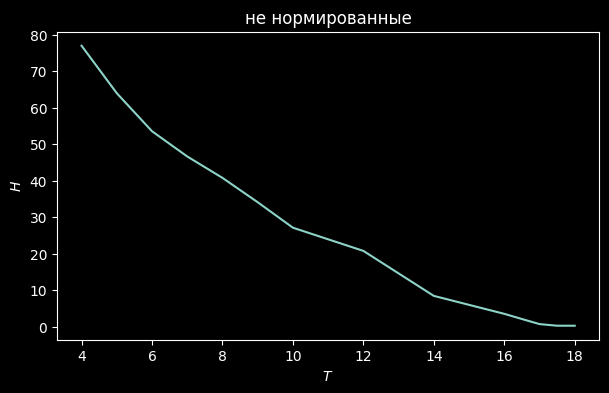

In [6]:
plt.figure(figsize=(7, 4))
plt.plot(T, H)


plt.xscale("linear")
# plt.yscale("log")
plt.xlabel(r'$T$')
plt.ylabel(r'$H$')
plt.title(r'не нормированные')
plt.show()

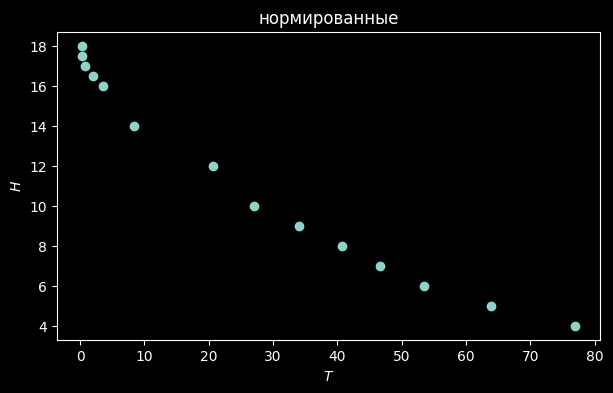

In [7]:
plt.figure(figsize=(7, 4))
plt.scatter(H, T)
plt.xscale("linear")
# plt.yscale("log")
plt.xlabel(r'$T$')
plt.ylabel(r'$H$')
plt.title(r'нормированные')
plt.show()

$ H_c(T) = H_c(0) (1 - \dfrac{T}{T_c}) $

In [9]:
def compute_Hc(T, Tc, H0):
    return H0 * (1 - T/Tc)

In [10]:
def loss_function(params, H, T):
    H0, Tc = params
    Hc = compute_Hc(T, Tc, H0)
    return np.mean((H - Hc) ** 2)

In [11]:
initial_params = [10, 10]
bounds = [
    (0, 1e9),
    (0, 1e9),
]  # Границы для оптимизации

In [12]:
result = minimize(loss_function, initial_params, args=(H, T),
                  bounds=bounds, method="Nelder-Mead")

In [13]:
result = differential_evolution(loss_function, bounds, args=(H, T))

In [14]:
H0_opt, Tc_opt = result.x
print(
    f"Оптимальные параметры: H0={H0_opt}, Tc={Tc_opt}")

Оптимальные параметры: H0=27.057711847579117, Tc=919367209.4943057


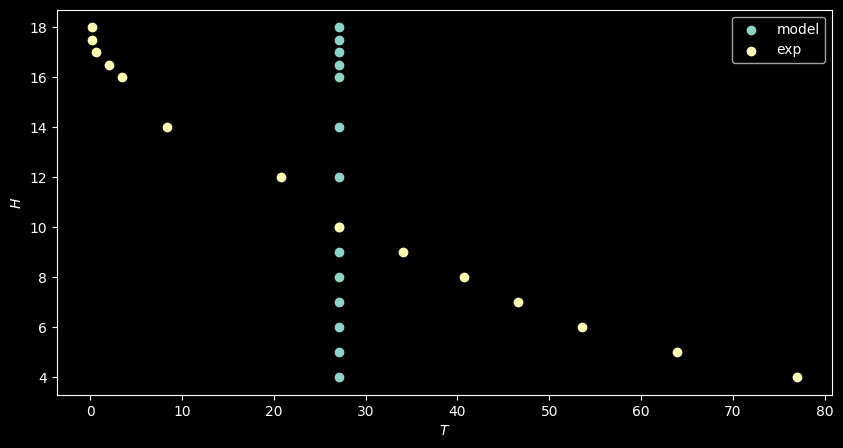

In [15]:
H_opt = compute_Hc(T, Tc_opt, H0_opt)

plt.figure(figsize=(10, 5))
plt.scatter(H_opt, T, label="model")

plt.scatter(H, T, label="exp")
plt.xlabel(r"$T$")
plt.ylabel(r"$H$")
plt.legend()
plt.show()

$
H_{c1} = \dfrac{he}{2m} \left( 1 + 2\int\limits_{\Delta} ^{\inf} dE ~ \dfrac{\partial f(E)}{\partial E} ~ \dfrac{E}{\sqrt{E^2 - \Delta_0^2 \tanh^2{\dfrac{T_c}{T} \sqrt{\dfrac{2}{3} \left(\dfrac{T_c}{T}-1 \right)}}}} \right) \cdot \ln{\left (\dfrac{\sqrt{m} \Delta_0 \tanh{\dfrac{T_c}{T} \sqrt{\dfrac{2}{3} \left(\dfrac{T_c}{T} -1 \right)}}}{\sqrt{4 \pi e^2} \hbar v_F \cdot \sqrt{1 + 2\int\limits_{\Delta} ^{\inf} dE ~ \dfrac{\partial f(E)}{\partial E} ~ \dfrac{E}{\sqrt{E^2 - \Delta_0^2 \tanh^2{\dfrac{T_c}{T} \sqrt{\dfrac{2}{3} \left(\dfrac{T_c}{T}-1 \right)}}}}}} \right)}
$

$f(E) = \dfrac{1}{\exp{\left(\dfrac{E}{kT}\right)}+1},~ \dfrac{\partial f}{\partial E} = - \dfrac{\exp{\left (\dfrac{E}{kT}\right)}}{kT \exp{\left(\dfrac{2E}{kT}\right) + 2kT \exp{\left(\dfrac{E}{kT}\right) + kT}}}$

$
\Delta = \Delta_0 \cdot \tanh{(\dfrac{T_c}{T} \sqrt{\dfrac{2}{3}(\dfrac{T_c}{T}-1)})} 
$

In [8]:
import numpy as np
import pandas as pd
from scipy.integrate import quad
from scipy.optimize import curve_fit
from math import sqrt, tanh, log, exp, pi

import mpmath as mp

In [ ]:
mp.dps = 50  # можно увеличить точность при необходимости

h = mp.mpf('6.62607015e-27')       # постоянная Планка (эрг·с)  
varh = mp.mpf('1.054571817e-27')    # редуцированная постоянная Планка (эрг·с)  
me = mp.mpf('9.1093837015e-28')     # масса электрона (г)  
e = mp.mpf('4.80320471257e-10')     # заряд электрона (Франклин, или статкулон)  
vf = mp.mpf('1e8')                  # Ферми-скорость (см/с)  
k = mp.mpf('1.380649e-16')          # постоянная Больцмана (эрг/К)  

In [57]:
h = mp.mpf('6.62607015e-34')   
varh = mp.mpf('1.054571817e-34')  
me = mp.mpf('9.1093837015e-31')
e = mp.mpf('-1.60217663e-19')    
vf = mp.mpf('1e5')               
k = mp.mpf('1.380649e-23')        

In [32]:
## В СИ
H = H * 1e-4

In [47]:
h * e / (2 * me)

mpf('5.8270323717522634e-23')

In [58]:
def f_mpf(E, T):
    return 1/(mp.exp(E/(k*T)) + 1)

def df_dE_mpf(E, T):
    ex = mp.exp(E/(k*T))
    return - ex / (k*T * (ex + 1)**2)

# Функция Delta_eff: вычисляет эффективное значение Δ при заданных Δ₀ и T_c для T<Tc
def Delta_eff_mpf(T, Delta0, Tc):
    if T >= Tc:
        return mp.mpf('0')
    arg = (Tc/T) * mp.sqrt((2/mp.mpf('3')) * ((Tc/T) - 1))
    return Delta0 * mp.tanh(arg)

# Интегрируемая функция для интеграла в модели
def integrand_mpf(E, T, Delta0, Tc):
    d_eff = Delta_eff_mpf(T, Delta0, Tc)
    if E <= d_eff:
        return mp.mpf('0')
    return df_dE_mpf(E, T) * E / mp.sqrt(E**2 - d_eff**2)

# Модель H_{c1} для одного значения температуры
def Hc1_model_single_mpf(T, Delta0, Tc):
    T_mpf = mp.mpf(T)
    d_eff = Delta_eff_mpf(T_mpf, Delta0, Tc)
    I = mp.quad(lambda E: integrand_mpf(E, T_mpf, Delta0, Tc), [d_eff, mp.inf])
    prefactor = (h * e) / (2 * me)
    multiplier = 1 + 2 * I
    num = mp.sqrt(me) * d_eff
    den = mp.sqrt(4 * mp.pi * e**2) * varh * vf * mp.sqrt(1 + 2 * I)
    if den == 0 or num <= 0:
        log_term = mp.mpf('0')
    else:
        log_term = mp.log(num/den)
    return prefactor * multiplier * log_term

# Обертка, возвращающая float, для удобства вычислений
def Hc1_model_wrapper(T, Delta0, Tc):
    return float(Hc1_model_single_mpf(mp.mpf(T), mp.mpf(Delta0), mp.mpf(Tc)))

In [59]:
def error_function(params, T_data, H_data):
    Delta0, Tc = params
    # Ограничим область, чтобы избежать невалидных значений (например, Tc<=0)
    if Tc <= 0 or Delta0 <= 0:
        return 1e20
    model_vals = np.array([Hc1_model_wrapper(t, Delta0, Tc) for t in T_data])
    error = np.sum((model_vals - H_data)**2)
    return error

Найденные параметры:
Delta0 = 1.0
Tc = 30.0


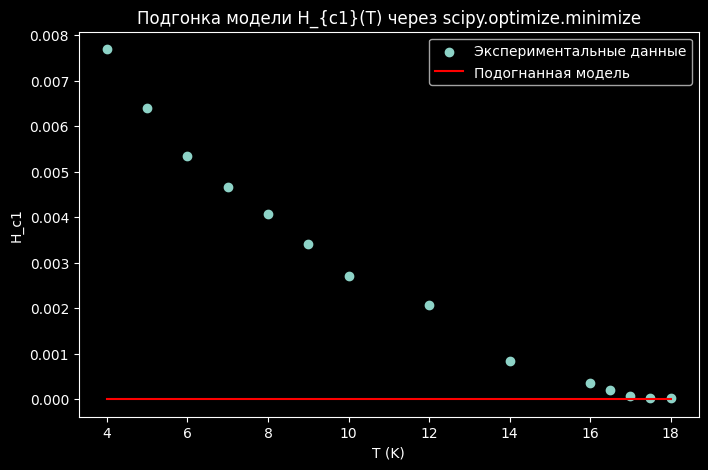

In [60]:
initial_guess = [1, 30]

# Зададим границы для параметров: Delta0 от 1e-30 до 1e-1, Tc от 0 до 1000
bounds = [(1e-30, 1e30), (1, 1000)]

# Запустим оптимизацию
result = minimize(error_function, initial_guess, args=(df['T'].values, H),
                    bounds=bounds, method='L-BFGS-B', options={'maxfun': 10000})

Delta0_fit, Tc_fit = result.x

print("Найденные параметры:")
print("Delta0 =", Delta0_fit)
print("Tc =", Tc_fit)

# Построим график для визуализации подогнанной модели
T_fit = np.linspace(df['T'].min(), df['T'].max(), 100)
H_fit = np.array([Hc1_model_wrapper(t, Delta0_fit, Tc_fit) for t in T_fit])

plt.figure(figsize=(8,5))
plt.scatter(df['T'], H, label='Экспериментальные данные')
plt.plot(T_fit, H_fit, 'r-', label='Подогнанная модель')
plt.xlabel("T (K)")
plt.ylabel("H_c1")
plt.legend()
plt.title("Подгонка модели H_{c1}(T) через scipy.optimize.minimize")
plt.show()

In [64]:
Tc = 30
Delta0 = np.arange(1e-30, 1e-28, 1e-29)
T_cont = 10

In [65]:
Hc_T0_list = [Hc1_model_single_mpf(T_cont, d, Tc) for d in Delta0]
# Преобразуем результаты в float, если они в формате mp.mpf
Hc_T0 = np.array([float(val) for val in Hc_T0_list])

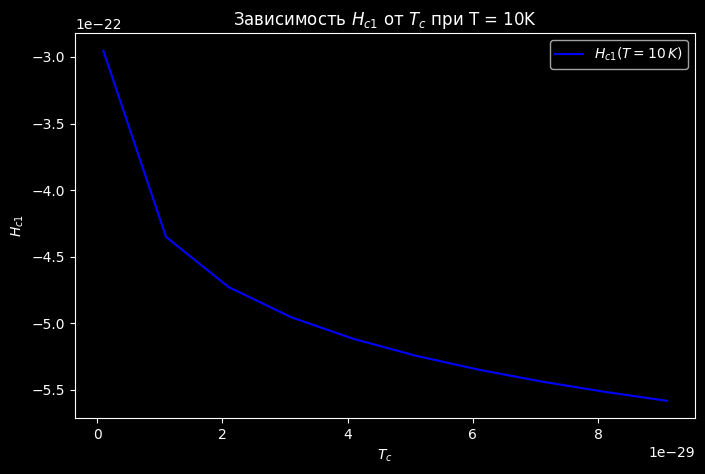

In [66]:
plt.figure(figsize=(8, 5))
plt.plot(Delta0, Hc_T0, 'b-', label=r'$H_{c1}(T=10\,K)$')
plt.xlabel(r'$T_c$')
plt.ylabel(r'$H_{c1}$')
plt.legend()
plt.title("Зависимость $H_{c1}$ от $T_c$ при T = 10K")
plt.show()

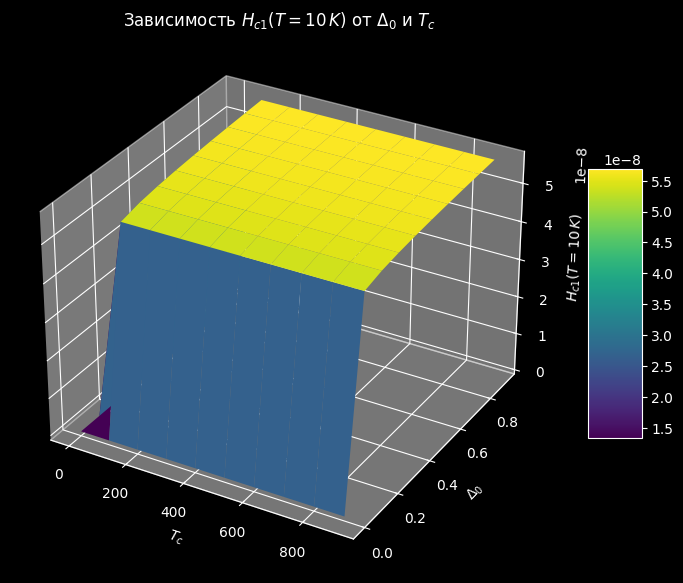

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# Задаём сетки для параметров
Tc_arr = np.arange(0, 1000, 100)          # Tc от 0 до 1000 с шагом 1
Delta0_arr = np.arange(0, 1e0, 1e-1)        # Delta0 от 0 до 1 с шагом 1e-3
T_cont = 10                             # Фиксированная температура T

# Предварительно выделяем массив для хранения значений Hc1
Hc_values = np.zeros((len(Delta0_arr), len(Tc_arr)))

# Заполняем массив Hc_values, проходясь по всем комбинациям Delta0 и Tc
for i, d in enumerate(Delta0_arr):
    for j, tc in enumerate(Tc_arr):
        try:
            # Вычисляем Hc1 для T_cont, Delta0 = d и Tc = tc
            Hc_values[i, j] = float(Hc1_model_single_mpf(T_cont, d, tc))
        except Exception as e:
            Hc_values[i, j] = np.nan  # если возникнет ошибка, запишем nan

# Создаем сетку для осей Tc и Delta0
Tc_grid, Delta0_grid = np.meshgrid(Tc_arr, Delta0_arr)
# Строим 3D график
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Построение поверхности, cmap можно выбрать по вкусу
surf = ax.plot_surface(Tc_grid, Delta0_grid, Hc_values, cmap='viridis', edgecolor='none')
ax.set_xlabel(r'$T_c$')
ax.set_ylabel(r'$\Delta_0$')
ax.set_zlabel(r'$H_{c1}(T=10\,K)$')
ax.set_title(r'Зависимость $H_{c1}(T=10\,K)$ от $\Delta_0$ и $T_c$')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

$
H_{c1}(T) = \frac{\Phi_0}{4\pi \lambda^2(0)} \cdot \rho(T) \cdot \ln\left(\frac{\lambda(T)}{\xi(T)}\right)
$

где:
$
\rho(T) = 1 + 2 \int\limits_{\Delta(T)}^{\infty} \frac{\partial f(E)}{\partial E} \frac{E}{\sqrt{E^2 - \Delta^2(T)}} \, dE
$

$
\lambda(T) = \frac{\lambda(0)}{\sqrt{\rho(T)}}
$

$
\xi(T) \approx \frac{\hbar v_F}{\Delta(T)}
$

$
\Phi_0 = \frac{h}{2e} \quad \text{(квант магнитного потока)}
$

$
\frac{\partial f(E)}{\partial E} = -\frac{1}{k_B T} \frac{e^{E/k_B T}}{(e^{E/k_B T} + 1)^2}
$

$
\Delta(T) = \Delta_0 \tanh\left(\frac{T_c}{T} \sqrt{\frac{2}{3}\left(\frac{T_c}{T} - 1\right)}\right)
$